In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
# go inside dogs-and-cats folder. Change it to the name of your dataset folders.
os.chdir('./dogs-and-cats')

#create 3 folders for train, test, and validation
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    # I will use 500 images for testing and training and 100 images for validation
    for c in random.sample(glob.glob('cat*'), 500):
        shutil.move(c, 'train/cat')
    for c in random.sample(glob.glob('dog*'), 500):
        shutil.move(c, 'train/dog')
    for c in random.sample(glob.glob('cat*'), 100):
        shutil.move(c, 'valid/cat')
    for c in random.sample(glob.glob('dog*'), 100):
        shutil.move(c, 'valid/dog')
    for c in random.sample(glob.glob('cat*'), 500):
        shutil.move(c, 'test/cat')
    for c in random.sample(glob.glob('dog*'), 500):
        shutil.move(c, 'test/dog')
    

In [3]:
# go back to the main directory
os.chdir('..')

In [4]:
train_path = './dogs-and-cats/train'
valid_path = './dogs-and-cats/valid'
test_path = './dogs-and-cats/test'

In [5]:
# preprocess your data using VGG16
# Our target size is 224 by 224, 
# classes are dogs and cats because this is just a binary classification problem
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


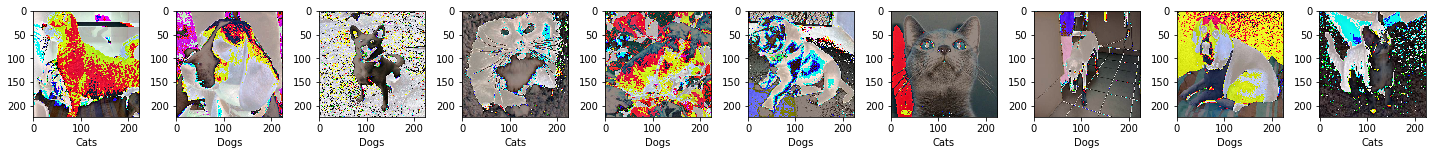

In [6]:
# we get the next batch and try to visualize it

imgs, labels = next(train_batches)

def plotImages(images_arr, labels_arr):
    fig, axes = plt.subplots(1,10, figsize=(20,20))
    axes = axes.flatten()
    index = 0
    label_names = ['Cats', 'Dogs']
    for img, ax in zip (images_arr, axes):
        ax.imshow(img.astype(np.uint8))
        ax.set_xlabel(label_names[np.argmax(labels_arr[index])])
        index += 1
    plt.tight_layout()
    plt.show()
    
plotImages(imgs, labels)

# you will see that the images are already preprocessed

In [9]:
# now will create are simple conv2d model
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same',input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(2, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 200706    
Total params: 210,850
Trainable params: 210,850
Non-trainable params: 0
________________________________________________

In [10]:
# we will compile it using Adam as optimizer and categorical_crossentropy for our loss function
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
# then we will train it for 10 epochs
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Train for 60 steps, validate for 20 steps
Epoch 1/10
60/60 - 27s - loss: 29.6690 - accuracy: 0.5783 - val_loss: 0.6580 - val_accuracy: 0.6450
Epoch 2/10
60/60 - 23s - loss: 0.4093 - accuracy: 0.8200 - val_loss: 0.7149 - val_accuracy: 0.6250
Epoch 3/10
60/60 - 22s - loss: 0.1729 - accuracy: 0.9533 - val_loss: 0.9434 - val_accuracy: 0.5900
Epoch 4/10
60/60 - 22s - loss: 0.0416 - accuracy: 0.9950 - val_loss: 1.1326 - val_accuracy: 0.6550
Epoch 5/10
60/60 - 22s - loss: 0.0089 - accuracy: 1.0000 - val_loss: 1.1792 - val_accuracy: 0.6100
Epoch 6/10
60/60 - 22s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 1.3420 - val_accuracy: 0.6350
Epoch 7/10
60/60 - 22s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.4821 - val_accuracy: 0.6350
Epoch 8/10
60/60 - 22s - loss: 7.3923e-04 - accuracy: 1.0000 - val_loss: 1.4232 - val_accuracy: 0.6450
Epoch 9/10
60/60 - 22s - loss: 4.7845e-04 - accuracy: 1.0000 - val_loss: 1.5381 - val_accuracy: 0.6300
Epoch 10/10
60/60 - 23s - loss: 2.5518e-04 - accuracy: 1.0

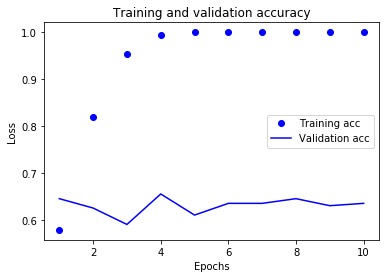

In [12]:
# we will plot are models to see how our loss and validation loss perform
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
# our model does overfit so bad, we will fix it later
# for now we will make our prediction and see how this model performs
predictions = model.predict(x=test_batches, verbose=0)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(test_batches.classes,np.argmax(predictions, axis=-1)))

              precision    recall  f1-score   support

           0       0.52      0.49      0.50       100
           1       0.51      0.54      0.53       100

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.52      0.51       200



In [16]:
# we have achieve 51% accuracy for our simple model
# lets add additional Conv2d layer and additional dense layer
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 108, 108, 32)      9248      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 106, 106, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 89888)            

In [17]:
# let's compile it again
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=5, verbose=2)

Train for 60 steps, validate for 20 steps
Epoch 1/5
60/60 - 51s - loss: 17.0642 - accuracy: 0.5517 - val_loss: 0.6724 - val_accuracy: 0.6100
Epoch 2/5
60/60 - 42s - loss: 0.3938 - accuracy: 0.8550 - val_loss: 0.8939 - val_accuracy: 0.6050
Epoch 3/5
60/60 - 42s - loss: 0.1539 - accuracy: 0.9500 - val_loss: 1.0189 - val_accuracy: 0.5700
Epoch 4/5
60/60 - 42s - loss: 0.0340 - accuracy: 0.9967 - val_loss: 1.2521 - val_accuracy: 0.5550
Epoch 5/5
60/60 - 42s - loss: 0.0115 - accuracy: 1.0000 - val_loss: 1.4196 - val_accuracy: 0.5550


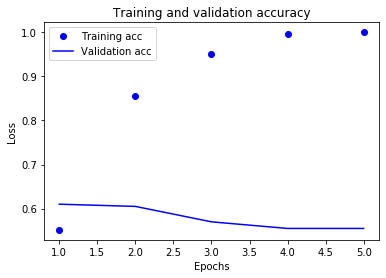

In [18]:
# we will plot again are results to see how our loss and validation loss perform
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
# We make a slight improvement vs our previous model
predictions = model.predict(x=test_batches, verbose=0)
print(classification_report(test_batches.classes,np.argmax(predictions, axis=-1)))

              precision    recall  f1-score   support

           0       0.53      0.51      0.52       100
           1       0.53      0.55      0.54       100

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.53      0.53       200



In [20]:
# now we will use a pretrained model called VGG16 for our dogs and cats image classification problem
vgg16_model = tf.keras.applications.vgg16.VGG16()
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [21]:
# we will add our vgg16 model to our model except the last layer
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)
    
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [22]:
# we will set trainable to False because it is a pretrained model
# we don't want to train it again
for layer in model.layers:
    layer.trainable= False

In [23]:
# add 2 units dense layer for our last layer
model.add(Dense(2, activation='softmax'))

In [24]:
# Let's compile and train it
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=train_batches, validation_data=valid_batches, epochs=5, verbose=2)

Train for 60 steps, validate for 20 steps
Epoch 1/5
60/60 - 349s - loss: 0.2195 - accuracy: 0.9300 - val_loss: 0.1413 - val_accuracy: 0.9550
Epoch 2/5
60/60 - 336s - loss: 0.0507 - accuracy: 0.9850 - val_loss: 0.1364 - val_accuracy: 0.9700
Epoch 3/5
60/60 - 333s - loss: 0.0061 - accuracy: 0.9983 - val_loss: 0.1283 - val_accuracy: 0.9700
Epoch 4/5
60/60 - 331s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1230 - val_accuracy: 0.9650
Epoch 5/5
60/60 - 332s - loss: 9.3933e-04 - accuracy: 1.0000 - val_loss: 0.1221 - val_accuracy: 0.9650


In [25]:
# lets predict our test data and see how it performs
predictions = model.predict(x=test_batches, verbose=0)
print(classification_report(test_batches.classes,np.argmax(predictions, axis=-1)))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       100
           1       0.96      1.00      0.98       100

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [31]:
# We already got the best result which is an accuracy of 98%
# But if for some reason we got did not get what we want
# Our next option is to fine tune the model by unfreezing layers and let it train on our current dataset